# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

644

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
base_url = "http://api.openweathermap.org/data/2.5/weather?appid="

# Create dataframe for loop
weatherDF = pd.DataFrame()
weatherDF["City"] = ""
weatherDF["Cloudiness"] = ""
weatherDF["Country"] = ""
weatherDF["Date"] = ""
weatherDF["Humidity"] = ""
weatherDF["Lat"] = ""
weatherDF["Lng"] = ""
weatherDF["Max Temp"] = ""
weatherDF["Wind Speed"] = ""

# Print Beginning Data Retrieval
print("Beginning Data Retrieval")
print("-------------------------------")

# Loop through all cities within cities
for x in np.arange(len(cities)):
    
    # Print processing of current record and city
    print(f"Processing record {x} | {cities[x]}")

    # Try these things
    try:
        
        # Request the current weather stats from URL in JSON form
        currentweather = requests.get(f"{base_url}{api_key}&q={cities[x]}&units=imperial").json()

        # Dataframe Variables
        weatherDF.loc[x, "City"] = currentweather["name"]
        weatherDF.loc[x, "Cloudiness"] = currentweather["clouds"]["all"]
        weatherDF.loc[x, "Country"] = currentweather["sys"]["country"]
        weatherDF.loc[x, "Date"] = currentweather["dt"]
        weatherDF.loc[x, "Humidity"] = currentweather["main"]["humidity"]
        weatherDF.loc[x, "Lat"] = currentweather["coord"]["lat"]
        weatherDF.loc[x, "Lng"] = currentweather["coord"]["lon"]
        weatherDF.loc[x, "Max Temp"] = currentweather["main"]["temp_max"]
        weatherDF.loc[x, "Wind Speed"] = currentweather["wind"]["speed"]

    # If previous block did not work display error message
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        
# Print Data Retrieval Complete
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

# Drop rows that have been added with no data or partial data
goodweather = weatherDF.dropna()

Beginning Data Retrieval
-------------------------------
Processing record 0 | chuy
Processing record 1 | teno
Processing record 2 | luang prabang
Processing record 3 | port macquarie
Processing record 4 | mataura
Processing record 5 | carnarvon
Processing record 6 | banda aceh
Processing record 7 | albany
Processing record 8 | tasiilaq
Processing record 9 | hobart
Processing record 10 | touros
Processing record 11 | beringovskiy
Processing record 12 | zarand
Processing record 13 | jamestown
Processing record 14 | vostok
Processing record 15 | samusu
City not found. Skipping...
Processing record 16 | bluff
Processing record 17 | marawi
Processing record 18 | bonthe
Processing record 19 | sentyabrskiy
City not found. Skipping...
Processing record 20 | zeya
Processing record 21 | xiaoyi
Processing record 22 | urusha
Processing record 23 | doha
Processing record 24 | hilton head island
Processing record 25 | rikitea
Processing record 26 | port elizabeth
Processing record 27 | bengkulu
Cit

Processing record 226 | mandan
Processing record 227 | codrington
Processing record 228 | yanam
Processing record 229 | saskylakh
Processing record 230 | grenville
Processing record 231 | dawei
Processing record 232 | atuona
Processing record 233 | cherskiy
Processing record 234 | eureka
Processing record 235 | norman wells
Processing record 236 | rajshahi
Processing record 237 | kahului
Processing record 238 | marcona
City not found. Skipping...
Processing record 239 | aykhal
Processing record 240 | juifang
City not found. Skipping...
Processing record 241 | airai
Processing record 242 | saint-philippe
Processing record 243 | jiayuguan
Processing record 244 | lundazi
Processing record 245 | tiruvottiyur
City not found. Skipping...
Processing record 246 | inhambane
Processing record 247 | maceio
Processing record 248 | yamada
Processing record 249 | bonavista
Processing record 250 | esperance
Processing record 251 | barentsburg
City not found. Skipping...
Processing record 252 | marond

Processing record 452 | shingu
Processing record 453 | alice springs
Processing record 454 | marinette
Processing record 455 | bud
Processing record 456 | nome
Processing record 457 | grand-santi
Processing record 458 | namatanai
Processing record 459 | coihaique
Processing record 460 | port-cartier
Processing record 461 | yumen
Processing record 462 | mezen
Processing record 463 | monsummano terme
Processing record 464 | pangnirtung
Processing record 465 | manaure
Processing record 466 | manggar
Processing record 467 | fort nelson
Processing record 468 | batemans bay
Processing record 469 | marzuq
Processing record 470 | aksay
Processing record 471 | finote selam
Processing record 472 | mlada boleslav
Processing record 473 | one hundred mile house
City not found. Skipping...
Processing record 474 | wladyslawowo
Processing record 475 | san juan
Processing record 476 | fulitun
City not found. Skipping...
Processing record 477 | atar
Processing record 478 | huanren
Processing record 479 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
goodweather.to_csv(output_data_file)

# Display counts of each column
goodweather.count()

City          579
Cloudiness    579
Country       579
Date          579
Humidity      579
Lat           579
Lng           579
Max Temp      579
Wind Speed    579
dtype: int64

In [8]:
#Display the final dataframe
goodweather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Chuy,83,UY,1575152526,51,-33.69,-53.46,77.58,5.55
1,Teno,0,CL,1575152526,21,-34.87,-71.16,82.99,2.24
2,Luang Prabang,33,LA,1575152526,98,19.89,102.14,58.48,0.45
3,Port Macquarie,90,AU,1575152527,88,-31.43,152.91,75.99,8.05
4,Mataura,100,NZ,1575152527,83,-46.19,168.86,57.99,3


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

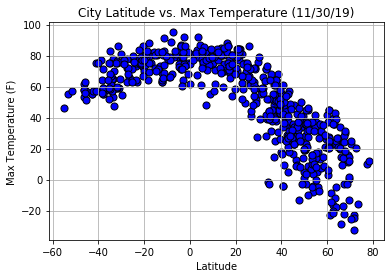

In [9]:
# Plot a scatter plot of latitude vs temperature with formatting
plt.scatter(goodweather["Lat"], goodweather["Max Temp"], color="blue",
edgecolors = "k", s = 50)

# Plot title and axis labels as well as the grid
plt.title(f"City Latitude vs. Max Temperature (11/30/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

# Save the figure to the output folder
plt.savefig("output_data/latVStemp.png")

#### Latitude vs. Humidity Plot

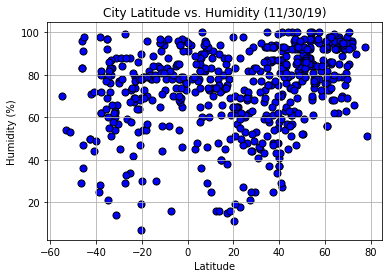

In [10]:
# Plot a scatter plot of latitude vs humidity with formatting
plt.scatter(goodweather["Lat"], goodweather["Humidity"],color="blue",
edgecolors = "k", s = 50)

# Plot title and axis labels as well as the grid
plt.title("City Latitude vs. Humidity (11/30/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure to the output folder
plt.savefig("output_data/latVShum.png")

#### Latitude vs. Cloudiness Plot

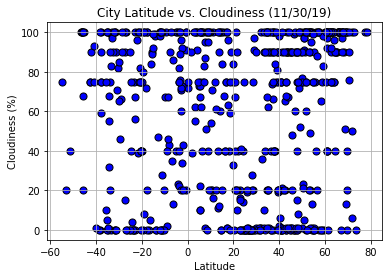

In [11]:
# Plot a scatter plot of latitude vs cloudiness with formatting
plt.scatter(goodweather["Lat"], goodweather["Cloudiness"],color="blue",
edgecolors = "k", s = 50)

# Plot title and axis labels as well as the grid
plt.title("City Latitude vs. Cloudiness (11/30/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure to the output folder
plt.savefig("output_data/latVScloud.png")

#### Latitude vs. Wind Speed Plot

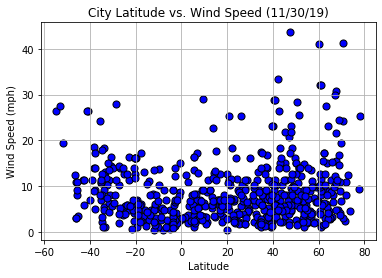

In [12]:
# Plot a scatter plot of latitude vs wind speed with formatting
plt.scatter(goodweather["Lat"], goodweather["Wind Speed"],color="blue",
edgecolors = "k", s = 50)

# Plot title and axis labels as well as the grid
plt.title("City Latitude vs. Wind Speed (11/30/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

plt.savefig("output_data/latVSwind.png")